In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from  scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D

In [3]:

df = pd.read_csv('clean.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'clean.csv'

In [ ]:
data = df.drop('Unnamed: 0',axis =1)

In [ ]:
data.head()

,bearer_id,start,start_ms,end,end_ms,imsi,msisdn_number,imei,last_location_name,avg_rtt_dl__ms_,...,youtube_dl__bytes_,youtube_ul__bytes_,netflix_dl__bytes_,netflix_ul__bytes_,gaming_dl__bytes_,gaming_ul__bytes_,other_dl__bytes_,other_ul__bytes_,total_ul__bytes_,total_dl__bytes_
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,42.000000,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.000000,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,54.448072,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,54.448072,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,54.448072,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 54 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   bearer_id                                 150001 non-null  object 
 1   start                                     150001 non-null  object 
 2   start_ms                                  150001 non-null  float64
 3   end                                       150001 non-null  object 
 4   end_ms                                    150001 non-null  float64
 5   imsi                                      150001 non-null  float64
 6   msisdn_number                             150001 non-null  float64
 7   imei                                      150001 non-null  float64
 8   last_location_name                        150001 non-null  object 
 9   avg_rtt_dl__ms_                           150001 non-null  float64
 10  avg_rtt_ul__ms_     

# Task 2 - User Engagement Analysis

objective:expected to track the user’s engagement using the following engagement metrics: 
●	sessions frequency 
●	the duration of the session 
●	the session total traffic (download and upload (bytes))


In [ ]:
# Convert start and end timestamps to datetime objects
data['start'] = pd.to_datetime(data['start'])
data['end'] = pd.to_datetime(data['end'])
    

# session frequency

In [ ]:
# calculate the session freqquency:

session_frequency = data.groupby('msisdn_number')['bearer_id'].count().reset_index(name='session_frequency').sort_values('session_frequency',ascending=False)
session_frequency

,msisdn_number,session_frequency
13526,3.362632e+10,1084
13180,3.362578e+10,17
6437,3.361489e+10,17
37052,3.365973e+10,16
92923,3.376054e+10,15
...,...,...
41061,3.366068e+10,1
41059,3.366068e+10,1
41058,3.366067e+10,1
41057,3.366067e+10,1


# Session duration

In [ ]:
sess_dur = data.groupby('msisdn_number')['dur___ms__1'].sum().reset_index(name='session_dur_hr').sort_values('session_dur_hr', ascending = False)

In [ ]:
sess_dur

,msisdn_number,session_dur_hr
13526,3.362632e+10,6.688563e+10
37052,3.365973e+10,2.087582e+09
6437,3.361489e+10,1.933339e+09
76363,3.367588e+10,1.927235e+09
13180,3.362578e+10,1.890414e+09
...,...,...
24741,3.365043e+10,7.267018e+06
85146,3.369839e+10,7.258080e+06
35287,3.365933e+10,7.189000e+06
60767,3.366566e+10,7.146574e+06


In [ ]:
sess_dur['session_dur_hr']=sess_dur['session_dur_hr'].apply(lambda x: int(x/(1000*60*60)%24))

In [ ]:
sess_dur

,msisdn_number,session_dur_hr
13526,3.362632e+10,6.688563e+10
37052,3.365973e+10,2.087582e+09
6437,3.361489e+10,1.933339e+09
76363,3.367588e+10,1.927235e+09
13180,3.362578e+10,1.890414e+09
...,...,...
24741,3.365043e+10,7.267018e+06
85146,3.369839e+10,7.258080e+06
35287,3.365933e+10,7.189000e+06
60767,3.366566e+10,7.146574e+06


# Total traffic:

In [ ]:
data['total_traffic'] = data['total_dl__bytes_']+data['total_ul__bytes_']

In [ ]:
data['total_traffic']

0         3.456294e+08
1         7.071854e+08
2         3.076910e+08
3         8.893527e+08
4         6.076814e+08
              ...     
149996    6.318041e+08
149997    7.057839e+08
149998    6.276986e+08
149999    4.015220e+08
150000    4.957631e+08
Name: total_traffic, Length: 150001, dtype: float64

In [ ]:
sess_trfc = data.groupby('msisdn_number')['total_traffic'].sum().reset_index(name='session_trfc').sort_values('session_trfc', ascending = False)

In [ ]:
sess_trfc

,msisdn_number,session_trfc
13526,3.362632e+10,5.397493e+11
6437,3.361489e+10,8.846226e+09
92923,3.376054e+10,8.514774e+09
13180,3.362578e+10,8.499621e+09
76363,3.367588e+10,7.891111e+09
...,...,...
76161,3.367548e+10,3.802236e+07
104769,3.378251e+10,3.792924e+07
63657,3.366668e+10,3.399962e+07
43677,3.366132e+10,3.357584e+07


In [ ]:
sess_trfc['session_trfc_mb'] = (sess_trfc['session_trfc'] / 1024) / 1024
session_trfc = sess_trfc.drop('session_trfc',axis=1)
session_trfc


,msisdn_number,session_trfc_mb
13526,3.362632e+10,514745.010179
6437,3.361489e+10,8436.419004
92923,3.376054e+10,8120.321239
13180,3.362578e+10,8105.869982
76363,3.367588e+10,7525.549515
...,...,...
76161,3.367548e+10,36.260945
104769,3.378251e+10,36.172143
63657,3.366668e+10,32.424568
43677,3.366132e+10,32.020416


In [ ]:
aggregate_metrics  = sess_dur.merge(session_frequency,on='msisdn_number').merge(session_trfc, on='msisdn_number')

In [ ]:
aggregate_metrics

,msisdn_number,session_dur_hr,session_frequency,session_trfc_mb
0,3.362632e+10,6.688563e+10,1084,514745.010179
1,3.365973e+10,2.087582e+09,16,7348.883422
2,3.361489e+10,1.933339e+09,17,8436.419004
3,3.367588e+10,1.927235e+09,15,7525.549515
4,3.362578e+10,1.890414e+09,17,8105.869982
...,...,...,...,...
106851,3.365043e+10,7.267018e+06,1,199.216558
106852,3.369839e+10,7.258080e+06,1,797.900773
106853,3.365933e+10,7.189000e+06,1,266.842393
106854,3.366566e+10,7.146574e+06,1,647.084608


# ●	Aggregate the above metrics per customer ID (MSISDN) and report the top 10 customers per engagement metric 

In [ ]:
# Group by 'msisdn_number' and calculate aggregated metrics
aggregated_metrics = aggregate_metrics.groupby('msisdn_number').agg(
    session_dur_hr=('session_dur_hr', 'sum'),
    session_frequency=('session_frequency', 'sum'),
    session_trfc_mb=('session_trfc_mb', 'sum')
)

# - Top 10 customers per session duration 

In [ ]:
top_10_session_dur = aggregated_metrics.sort_values(by='session_dur_hr', ascending=False).head(10)
top_10_session_dur

,session_dur_hr,session_frequency,session_trfc_mb
msisdn_number,,,
3.362632e+10,6.688563e+10,1084,514745.010179
3.365973e+10,2.087582e+09,16,7348.883422
3.361489e+10,1.933339e+09,17,8436.419004
3.367588e+10,1.927235e+09,15,7525.549515
3.362578e+10,1.890414e+09,17,8105.869982
3.376054e+10,1.851397e+09,15,8120.321239
3.365936e+10,1.820838e+09,11,4442.631852
3.366471e+10,1.620076e+09,11,6584.133433
3.378632e+10,1.573490e+09,12,5361.777810


**Finding: all the top-10 customer from session duration spends same time on data session**

In [ ]:
sess_dur_counts = aggregated_metrics.session_dur_hr.value_counts().sort_values(ascending=False).reset_index(name='customer counts')
sess_dur_counts.rename(columns={"index":'hours'}, inplace=True)
sess_dur_counts

,hours,customer counts
0,1.046091e+08,3019
1,2.092182e+08,149
2,8.639996e+07,80
3,8.639996e+07,79
4,8.639995e+07,78
...,...,...
92208,1.476950e+08,1
92209,2.969783e+08,1
92210,1.780240e+08,1
92211,1.388981e+07,1


**Finding: here we found that there are total-17299 customer who spends 23 hrs on data session**

# - Top 10 customers per session traffic

In [ ]:
top_10_session_trfc_mb = aggregated_metrics.sort_values(by='session_trfc_mb', ascending=False).head(10)
top_10_session_trfc_mb

,session_dur_hr,session_frequency,session_trfc_mb
msisdn_number,,,
3.362632e+10,6.688563e+10,1084,514745.010179
3.361489e+10,1.933339e+09,17,8436.419004
3.376054e+10,1.851397e+09,15,8120.321239
3.362578e+10,1.890414e+09,17,8105.869982
3.367588e+10,1.927235e+09,15,7525.549515
3.365973e+10,2.087582e+09,16,7348.883422
3.366646e+10,1.332595e+09,11,6969.929636
3.376041e+10,1.412371e+09,12,6801.958574
3.366471e+10,1.620076e+09,11,6584.133433


**from  here we can see that customer having msisdn number '3.362632e+10' has an outsized (outlier) positive difference from the average session traffic of the top ten.**

In [ ]:
# to know why let draw a correlation between session frequency and sessio  traffic

trfc_frq = aggregated_metrics[['session_frequency','session_trfc_mb']]
trfc_frq.sort_values(by='session_trfc_mb',ascending=False)

,session_frequency,session_trfc_mb
msisdn_number,,
3.362632e+10,1084,514745.010179
3.361489e+10,17,8436.419004
3.376054e+10,15,8120.321239
3.362578e+10,17,8105.869982
3.367588e+10,15,7525.549515
...,...,...
3.367548e+10,1,36.260945
3.378251e+10,1,36.172143
3.366668e+10,1,32.424568


In [ ]:
trfc_frq_corr = trfc_frq.corr()
trfc_frq_corr.iloc[1,0]

0.9857997807604783

**Here we can see that there is a strong positive correlation between session frequency and session trfc**

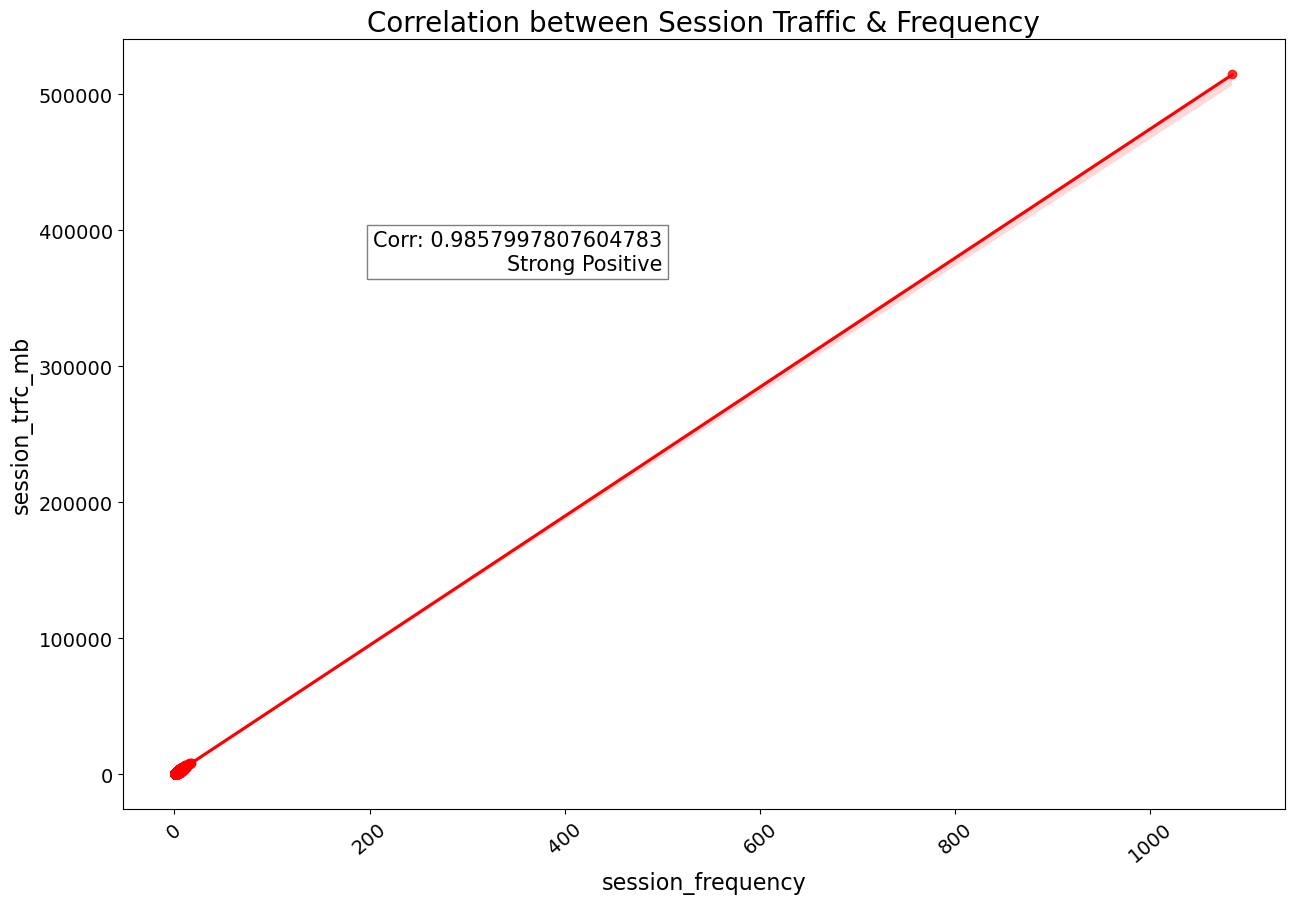

In [ ]:
plt.subplots(figsize=(15,10))
plt.xticks(rotation=40, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Session Frequency', fontsize=16)
plt.ylabel('Session Traffic', fontsize=16)
plt.title('Correlation between Session Traffic & Frequency', fontsize=20)
sns.regplot(data=trfc_frq, y='session_trfc_mb', x='session_frequency', scatter=True, color='r')
plt.text(500, 400000, s= f'Corr: {trfc_frq_corr.iloc[1,0]}\nStrong Positive', fontsize=15,
         horizontalalignment='right',
         bbox=dict(facecolor='w', alpha=0.5),
         verticalalignment='top')
plt.show()

In [ ]:
#plotting correlation matrix for all metrics

agg_metrics_corr = aggregated_metrics.corr()
agg_metrics_corr

,session_dur_hr,session_frequency,session_trfc_mb
session_dur_hr,1.000000,0.948392,0.93475
session_frequency,0.948392,1.000000,0.98580
session_trfc_mb,0.934750,0.985800,1.00000


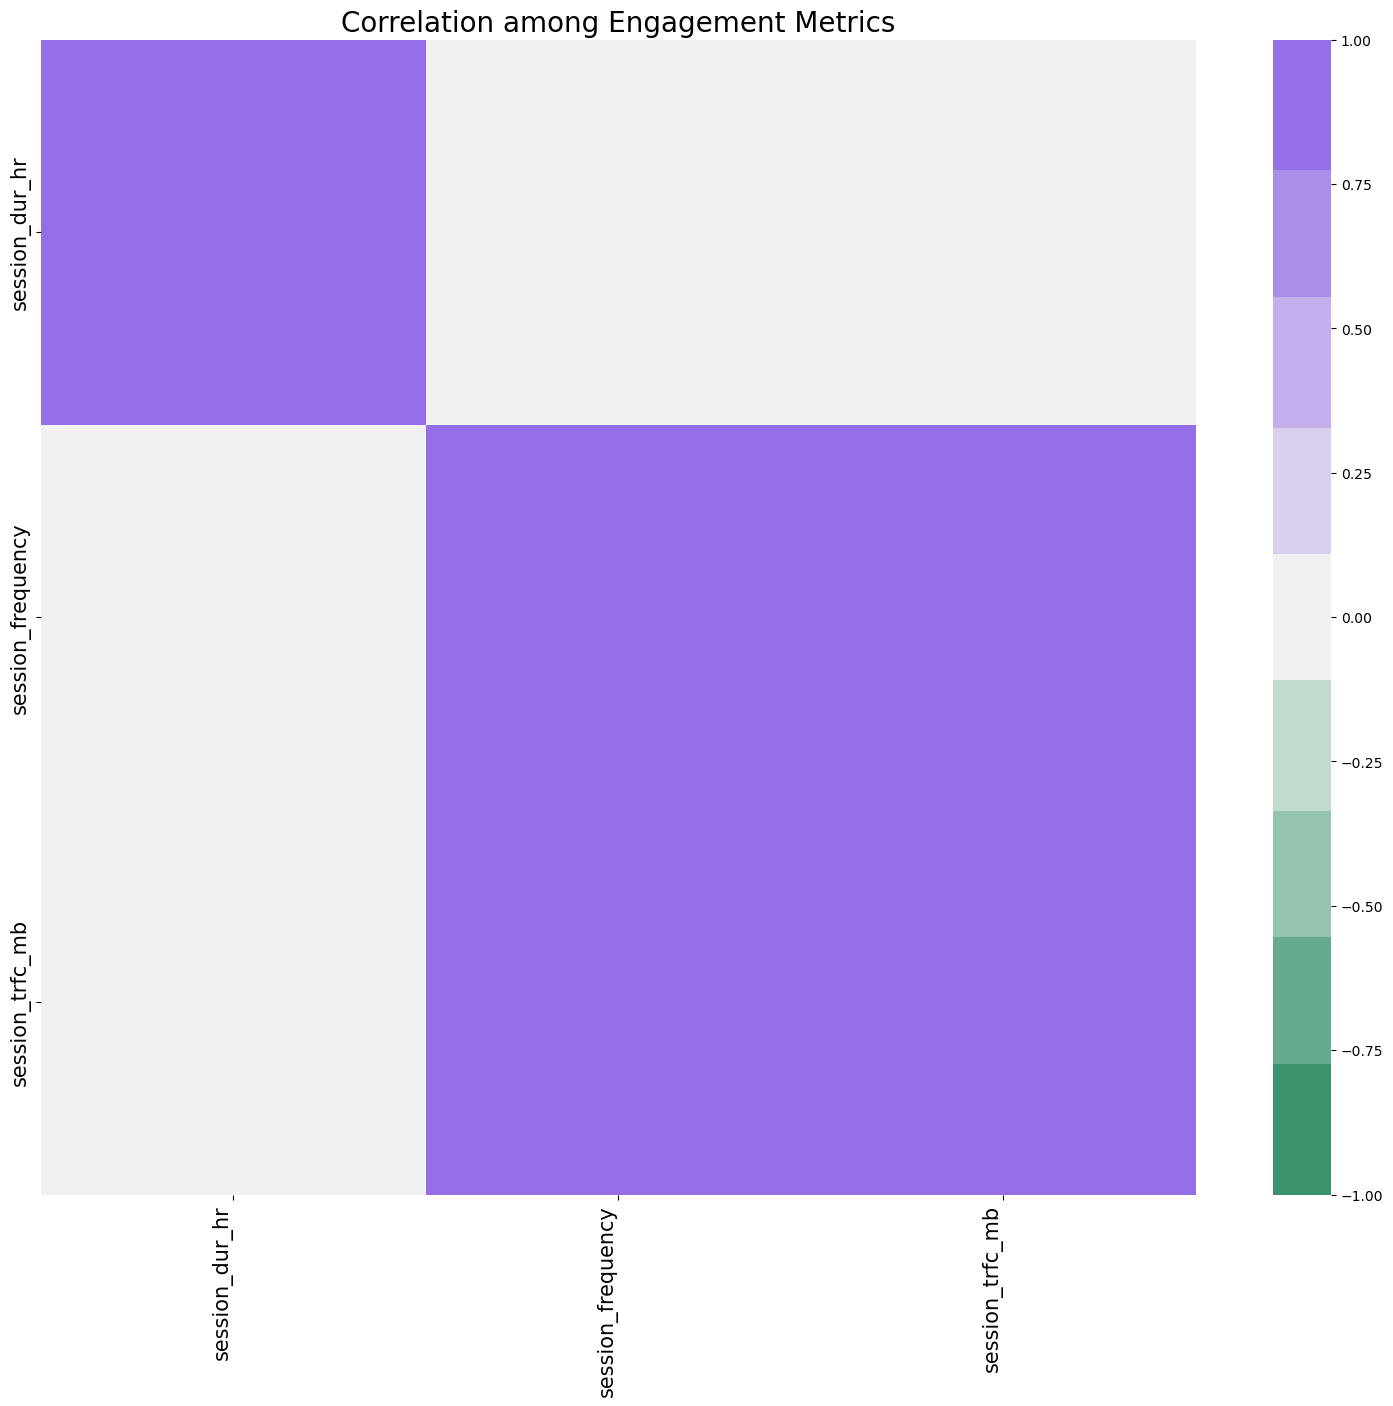

In [ ]:
plt.subplots(figsize=(20, 15))
plt.title('Correlation among Engagement Metrics', fontsize=20)
ax = sns.heatmap(
    agg_metrics_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(150, 275, s=80, l=55, n=9),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

##Aggregate user total traffic per application and derive the top 10 most engaged users per application

In [ ]:
columns = ['bearer_id', 'msisdn_number',
           'http_dl__bytes_', 'http_ul__bytes_', 'activity_duration_dl__ms_',
       'activity_duration_ul__ms_', 'dur___ms__1', 
          'social_media_dl__bytes_', 'social_media_ul__bytes_',
       'google_dl__bytes_', 'google_ul__bytes_', 'email_dl__bytes_',
       'email_ul__bytes_', 'youtube_dl__bytes_', 'youtube_ul__bytes_',
       'netflix_dl__bytes_', 'netflix_ul__bytes_', 'gaming_dl__bytes_',
       'gaming_ul__bytes_', 'other_dl__bytes_', 'other_ul__bytes_',
       'total_ul__bytes_', 'total_dl__bytes_']


data2 = data[columns]

NameError: name 'data' is not defined

**Finding: from here we can conclude that as the session frequnecy increases, session traffic also increases**

# ●	Normalize each engagement metric and run a k-means (k=3) to classify customers into three groups of engagement. 

In [ ]:
data.columns

Index(['bearer_id', 'start', 'start_ms', 'end', 'end_ms', 'imsi',
       'msisdn_number', 'imei', 'last_location_name', 'avg_rtt_dl__ms_',
       'avg_rtt_ul__ms_', 'avg_bearer_tp_dl__kbps_', 'avg_bearer_tp_ul__kbps_',
       'tcp_dl_retrans__vol__bytes_', 'tcp_ul_retrans__vol__bytes_',
       'dl_tp_<_50_kbps__%_', '50_kbps_<_dl_tp_<_250_kbps__%_',
       '250_kbps_<_dl_tp_<_1_mbps__%_', 'dl_tp_>_1_mbps__%_',
       'ul_tp_<_10_kbps__%_', '10_kbps_<_ul_tp_<_50_kbps__%_',
       '50_kbps_<_ul_tp_<_300_kbps__%_', 'ul_tp_>_300_kbps__%_',
       'http_dl__bytes_', 'http_ul__bytes_', 'activity_duration_dl__ms_',
       'activity_duration_ul__ms_', 'dur___ms__1', 'handset_manufacturer',
       'handset_type', 'nb_of_sec_with_125000b_<_vol_dl',
       'nb_of_sec_with_1250b_<_vol_ul_<_6250b',
       'nb_of_sec_with_31250b_<_vol_dl_<_125000b',
       'nb_of_sec_with_37500b_<_vol_ul',
       'nb_of_sec_with_6250b_<_vol_dl_<_31250b',
       'nb_of_sec_with_6250b_<_vol_ul_<_37500b',
       'nb_of

In [ ]:
aggregated_metrics.columns

Index(['session_dur_hr', 'session_frequency', 'session_trfc_mb'], dtype='object')

In [ ]:
km = KMeans(n_clusters=3, random_state=0)
km

KMeans(n_clusters=3, random_state=0)

In [ ]:
agg_metrics=  sess_dur.merge(session_frequency,on='msisdn_number').merge(session_trfc, on='msisdn_number')
norm_metrics = agg_metrics[['session_dur_hr','session_frequency','session_trfc_mb']]

In [ ]:
scaler = MinMaxScaler()

scaled_metrics = scaler.fit_transform(norm_metrics)
scaled_metrics


array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [3.11077455e-02, 1.38504155e-02, 1.42160202e-02],
       [2.88014349e-02, 1.47737765e-02, 1.63289160e-02],
       ...,
       [6.87994070e-07, 0.00000000e+00, 4.56824540e-04],
       [5.36196369e-08, 0.00000000e+00, 1.19557019e-03],
       [0.00000000e+00, 0.00000000e+00, 9.72892910e-04]])

# Verify minimum & maximum value of all features

In [ ]:
scaled_metrics.min()

0.0

In [ ]:
scaled_metrics.max()

1.0000000000000002

In [ ]:
km.fit(scaled_metrics)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [ ]:
# centroid values 

metrics_cluster = km.cluster_centers_
metrics_cluster

array([[1.40605981e-03, 1.62477475e-04, 1.00952392e-03],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [4.92308299e-03, 1.81887738e-03, 2.73170965e-03]])

In [ ]:
eng_centroids = pd.DataFrame(metrics_cluster)
eng_centroids

,0,1,2
0,0.001406,0.000162,0.001010
1,1.000000,1.000000,1.000000
2,0.004923,0.001819,0.002732


In [ ]:
eng_centroids.to_csv('engagement_centroids.csv')

#  Labels

- assign labels to users

In [ ]:
set(km.labels_.tolist())

{0, 1, 2}

In [ ]:
norm_metrics['clusters'] = km.labels_

In [ ]:
norm_metrics


,session_dur_hr,session_frequency,session_trfc_mb,clusters
0,3,1084,514745.010179,1
1,3,16,7348.883422,1
2,9,17,8436.419004,0
3,7,15,7525.549515,1
4,21,17,8105.869982,2
...,...,...,...,...
106851,2,1,199.216558,1
106852,2,1,797.900773,1
106853,1,1,266.842393,1
106854,1,1,647.084608,1


In [ ]:
agg_metrics = sess_dur.merge(session_frequency,on='msisdn_number').merge(session_trfc, on='msisdn_number')
agg_metrics

,msisdn_number,session_dur_hr,session_frequency,session_trfc_mb
0,3.362632e+10,3,1084,514745.010179
1,3.365973e+10,3,16,7348.883422
2,3.361489e+10,9,17,8436.419004
3,3.367588e+10,7,15,7525.549515
4,3.362578e+10,21,17,8105.869982
...,...,...,...,...
106851,3.365043e+10,2,1,199.216558
106852,3.369839e+10,2,1,797.900773
106853,3.365933e+10,1,1,266.842393
106854,3.366566e+10,1,1,647.084608


In [ ]:
engagement_cluster = norm_metrics.merge(agg_metrics.msisdn_number, 
                                        left_index=True, right_index=True)

In [ ]:
engagement_cluster.rename(columns={'msisdn_number':'users'}, inplace=True)
engagement_cluster

,session_dur_hr,session_frequency,session_trfc_mb,clusters,users
0,3,1084,514745.010179,1,3.362632e+10
1,3,16,7348.883422,1,3.365973e+10
2,9,17,8436.419004,0,3.361489e+10
3,7,15,7525.549515,1,3.367588e+10
4,21,17,8105.869982,2,3.362578e+10
...,...,...,...,...,...
106851,2,1,199.216558,1,3.365043e+10
106852,2,1,797.900773,1,3.369839e+10
106853,1,1,266.842393,1,3.365933e+10
106854,1,1,647.084608,1,3.366566e+10


In [ ]:
engagement_cluster.to_csv('engagement_cluster.csv')

# Compute the minimum, maximum, average & total non-normalized metrics for each cluster.                        

         - 

In [ ]:
session_dur = norm_metrics.groupby('clusters')['session_dur_hr'].aggregate(['min', 'max', 'mean', 'sum']).reset_index(drop=True)

In [ ]:
session_dur = session_dur.apply(lambda x: np.log(x)).sort_values(by='sum', ascending=False)
session_dur


C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,min,max,mean,sum
2,2.833213,3.135494,3.057153,13.508039
0,2.079442,2.772589,2.465429,12.839733
1,-inf,1.945910,1.236834,11.839823


<Figure size 3000x4000 with 0 Axes>

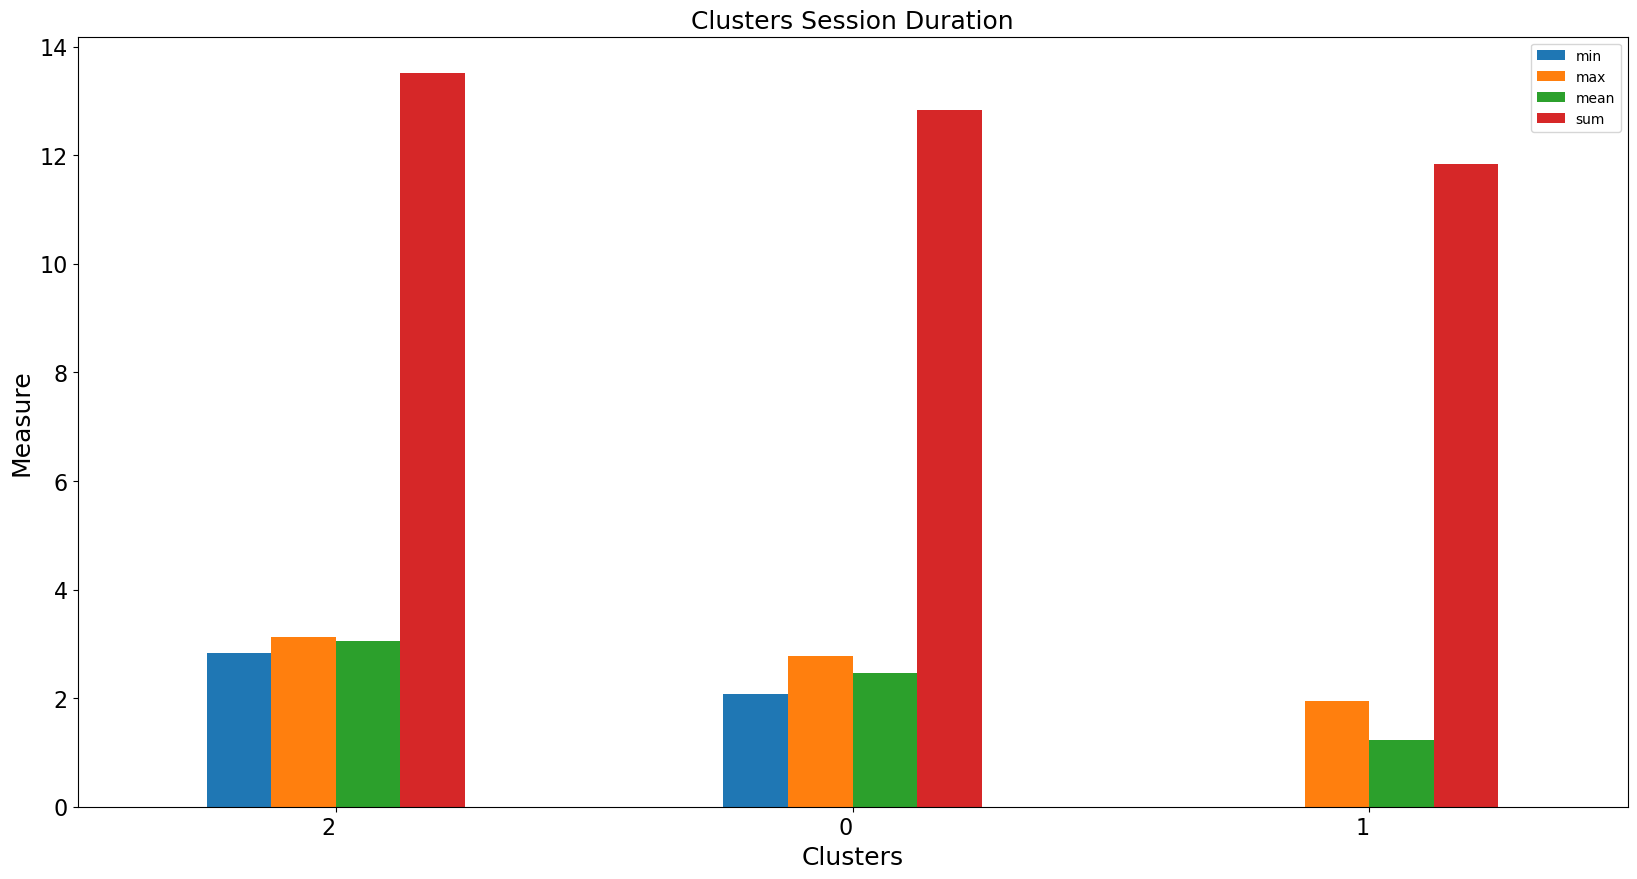

In [ ]:
plt.figure(figsize=(30,40))
# topAppsAggLog.plot(figsize=(5,5));
ax= session_dur.plot.bar(figsize=(20,10))
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=0, 
    horizontalalignment='right'
)
plt.title("Clusters Session Duration", fontsize=18)
plt.xticks(fontsize=16, rotation =0)
plt.yticks(fontsize=16) 
plt.xlabel('Clusters', fontsize=18)
plt.ylabel('Measure', fontsize=18)
plt.show()

 > Customers in cluster 2 have better engagement in session duration on average than others while customer in cluster 1 have the lowest
 > ALso customers with low engagement falls under cluster-2

# Session Frequency

In [ ]:
session_frq = norm_metrics.groupby('clusters')['session_frequency'].aggregate(['min', 'max', 'mean', 'sum']).reset_index(drop=True)

In [ ]:
session_frq = session_frq.apply(lambda x: np.log(x)).sort_values(by='sum', ascending=False)

In [ ]:
session_frq


,min,max,mean,sum
1,0.0,6.988413,0.307233,10.910222
2,0.0,2.833213,0.385631,10.836517
0,0.0,2.833213,0.327232,10.701535



> Customers in cluster 2 have better engagement in session frequency on average than others while customer in cluster 1 have the lowest

 > However, customers in cluster 2 have the maximum number of session frequency

# Total Session Traffic

In [ ]:
session_trfc = norm_metrics.groupby('clusters')['session_trfc_mb'].aggregate(['min', 'max', 'mean', 'sum']).reset_index(drop=True)
session_trfc = session_trfc.apply(lambda x: np.log(x)).sort_values(by='sum', ascending=False)
session_trfc


,min,max,mean,sum
1,3.478916,13.151427,6.465546,17.068536
2,3.466374,9.000344,6.545039,16.995926
0,3.456592,9.040313,6.485479,16.859783


> Customers in cluster 2 have better engagement in total session traffic on average than others while customer in cluster 1 have the lowest

> Also cluster 1 has the maximum number of total session traffic - This is a trend with cluster 2

In [ ]:
# using elbow method to find the optimised value of k

In [ ]:
scaled_metrics

array([[1.30434783e-01, 1.00000000e+00, 1.00000000e+00],
       [1.30434783e-01, 1.38504155e-02, 1.42160202e-02],
       [3.91304348e-01, 1.47737765e-02, 1.63289160e-02],
       ...,
       [4.34782609e-02, 0.00000000e+00, 4.56824540e-04],
       [4.34782609e-02, 0.00000000e+00, 1.19557019e-03],
       [4.34782609e-02, 0.00000000e+00, 9.72892910e-04]])

In [ ]:
Sum_of_squared_distances = []
K = range(1,26)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(scaled_metrics)
    Sum_of_squared_distances.append(km.inertia_)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\

In [ ]:
Sum_of_squared_distances

[12282.170960991505,
 2637.0869182880897,
 1113.8435512474744,
 628.0143677773857,
 362.63357806185775,
 242.7335619482929,
 175.83988481410225,
 131.50884976162772,
 96.2202624895819,
 79.8821074994983,
 61.534458172302706,
 51.006075550317306,
 47.10781564684173,
 43.07749528593731,
 32.55944771829251,
 27.67118865890476,
 23.763712736720638,
 19.7318791296949,
 16.740593936123858,
 13.361552477760615,
 10.285131172962451,
 7.303158037197288,
 4.595671091147482,
 2.142927702989566,
 0.14612959893568261]

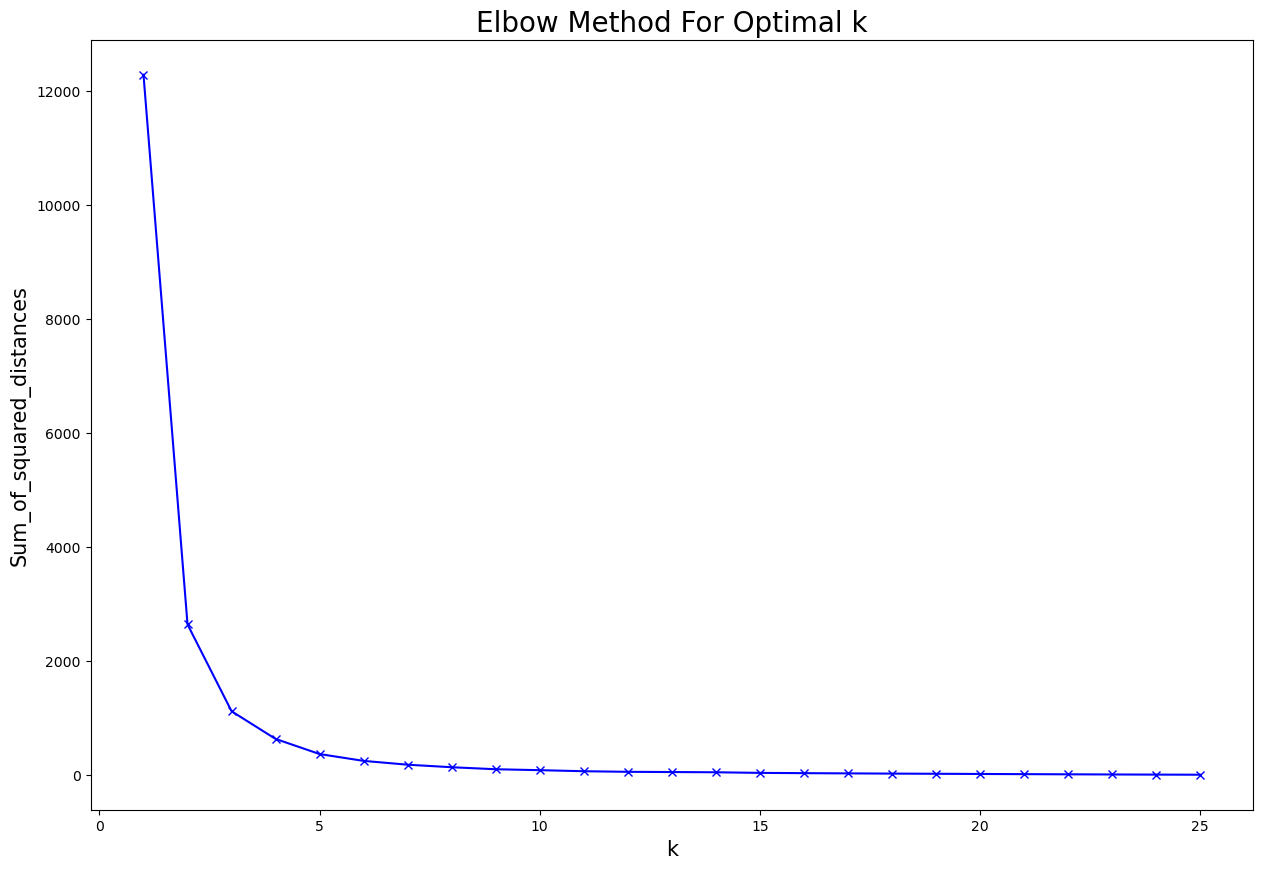

In [ ]:
plt.subplots(figsize=(15, 10))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k', fontsize=15)
plt.ylabel('Sum_of_squared_distances', fontsize=15)
plt.title('Elbow Method For Optimal k', fontsize=20)
plt.show()

**In the plot above the elbow is at k=3 indicating the optimal k for this dataset is 3**